# k最近傍法

## 1. データを用意
今回はsklearnのmake_blobs(染みが広がったような特徴のあるデータセット)でデータを用意．

In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X, y = make_blobs(random_state=0)

In [3]:
X

array([[ 2.63185834,  0.6893649 ],
       [ 0.08080352,  4.69068983],
       [ 3.00251949,  0.74265357],
       [-0.63762777,  4.09104705],
       [-0.07228289,  2.88376939],
       [ 0.62835793,  4.4601363 ],
       [-2.67437267,  2.48006222],
       [-0.57748321,  3.0054335 ],
       [ 2.72756228,  1.3051255 ],
       [ 0.34194798,  3.94104616],
       [ 1.70536064,  4.43277024],
       [ 2.20656076,  5.50616718],
       [ 2.52092996, -0.63858003],
       [ 2.50904929,  5.7731461 ],
       [-2.27165884,  2.09144372],
       [ 3.92282648,  1.80370832],
       [-1.62535654,  2.25440397],
       [ 0.1631238 ,  2.57750473],
       [-1.59514562,  4.63122498],
       [-2.63128735,  2.97004734],
       [-2.17052242,  0.69447911],
       [-1.56618683,  1.74978876],
       [-0.88677249,  1.30092622],
       [ 0.08848433,  2.32299086],
       [ 0.9845149 ,  1.95211539],
       [ 2.18217961,  1.29965302],
       [ 1.28535145,  1.43691285],
       [ 0.89011768,  1.79849015],
       [-1.89608585,

In [4]:
y

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

2つのクラスだけ取り出して整形．

In [5]:
X, y = X[y != 2], y[y != 2]

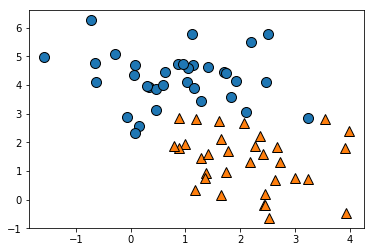

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

## 2. 機械学習

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 2.1. 教師データとテストデータに分割

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 2.2. モデル生成

In [9]:
clf = KNeighborsClassifier(n_neighbors=3)

### 2.3. 学習

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### 2.4. 予測

In [11]:
clf.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [12]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

## 3. 評価
### 3.1. スコア出力

In [13]:
round(clf.score(X_test, y_test), 3)

0.882

### 3.1. パラメータ調整

In [14]:
for n in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    print("Test set accuracy : n={}, {:.2f}".format(n, clf.score(X_test, y_test)))

Test set accuracy : n=1, 0.94
Test set accuracy : n=2, 0.88
Test set accuracy : n=3, 0.88
Test set accuracy : n=4, 0.88
Test set accuracy : n=5, 0.94
Test set accuracy : n=6, 0.88
Test set accuracy : n=7, 0.88
Test set accuracy : n=8, 0.88
Test set accuracy : n=9, 0.88
Test set accuracy : n=10, 0.88
Test set accuracy : n=11, 0.88
Test set accuracy : n=12, 0.88
Test set accuracy : n=13, 0.88
Test set accuracy : n=14, 0.88
Test set accuracy : n=15, 0.88


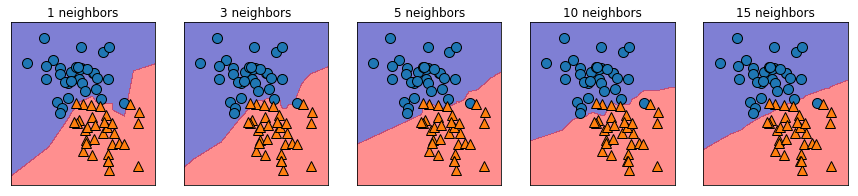

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for n, ax in zip([1, 3, 5, 10, 15], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n))
    
plt.show()

## おまけ: さらに複雑なデータの場合

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()

In [18]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
cancer.data.shape

(569, 30)

In [22]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

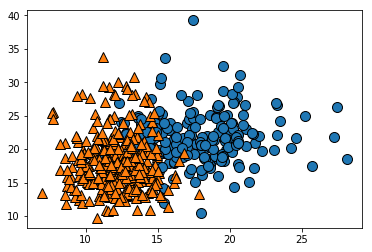

In [23]:
mglearn.discrete_scatter(cancer.data[:, 0], cancer.data[:, 1], cancer.target)

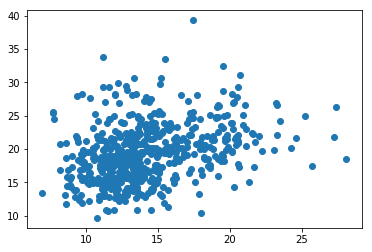

In [24]:
plt.scatter(cancer.data[:, 0], cancer.data[:, 1])
plt.show()

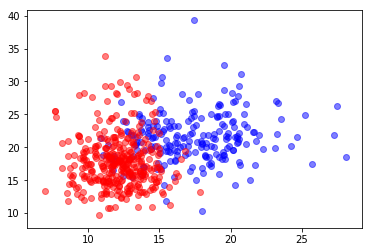

In [25]:
X_1_blue = cancer.data[:, 0][cancer.target == 0]
X_2_blue = cancer.data[:, 1][cancer.target == 0]
X_1_red = cancer.data[:, 0][cancer.target == 1]
X_2_red = cancer.data[:, 1][cancer.target == 1]
plt.scatter(X_1_blue, X_2_blue, c='blue', alpha=0.5)
plt.scatter(X_1_red, X_2_red, c='red', alpha=0.5)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [27]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [28]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [29]:
clf.predict(X_test) == y_test

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [30]:
clf.score(X_test, y_test)

0.916083916083916

In [31]:
clf.outputs_2d_

False